# Milestone 1
___

Name: Luctfy Alkatiri Moehtar

Batch: HCK-032

___

# Introduction

## Background

In e-commerce transactions, there are many things beyond our control that can cause problems — one common issue is delayed product or package delivery. This often happens and has become a major concern that affects customer satisfaction and trust in the service. Several factors can cause a product to arrive late at its destination. 

By using an e-commerce shipping dataset, this analysis aims to find out which factors influence delivery delays or on-time performance.The goal of this data analysis is to gain useful insights that can help the company optimize logistics processes, reduce delivery delays, and improve overall customer satisfaction.

## Objective

- Identify the key factors that influence shipping delays based on customer, product, and logistics aspects.
- Measure how much each variable affects delivery performance (on-time or delayed) from a business perspective.
- Analyze the e-commerce shipping dataset to generate insights and visualizations that explain delay patterns.
- Provide data-driven recommendations to help improve logistics efficiency and customer satisfaction.
- Deliver clear insights and findings within one day to support faster decision-making and reduce future delivery delays.

# Problem Statement & Dataset Description

## Problem Statement

This project aims to identify the key factors that influence shipping delays by analyzing various aspects related to customers, products, and logistics. The analysis will measure how much each variable affects delivery performance (on-time or delayed) from a business perspective. Using an e-commerce shipping dataset of electronic products, the study will generate insights and visualizations to support decision-making. The results are expected to help the company understand the causes of delays, improve logistics efficiency, and enhance customer satisfaction. This analysis is targeted to deliver actionable insights within one day to support improvements in delivery time and reduce shipping delays.

## Penjabaran Masalah

This section describes the main problem statements for this case, which will serve as the basis for the data analysis:

- What are the main factors that contribute the most to shipping delays?
- Which customers contact customer care more often — those with delayed deliveries or on-time deliveries?
- When do shipping delays most frequently occur based on package weight? For example, are heavier packages (above average weight) more likely to be delayed than lighter ones?
- Which warehouse experiences the most frequent delays?
- Why do products with high importance still have the potential to be delayed?
- How does the type of shipping method correlate with whether a delivery is delayed or on time?

## Dataset

### Dataset Source

Source : https://www.kaggle.com/datasets/ulrikthygepedersen/shipping-ecommerce?select=shipping_ecommerce.csv

# Data Loading 

## Import Libraries

In [ ]:
# Import Library 

# Data preprocessing
import pandas as pd
import numpy as np
from scipy import stats

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

## Data Loading

In [ ]:
# Data loading CSV to DataFrame
df = pd.read_csv("dataset_raw.csv")
df

,Customer_care_calls,Customer_rating,Prior_purchases,Discount_offered,Weight_in_gms,Warehouse_block,Mode_of_Shipment,Product_importance,Gender,Class
0,5,4,2,10,5395,A,Ship,medium,M,1
1,4,3,2,6,5867,F,Ship,medium,F,0
2,3,4,2,2,5957,D,Ship,medium,M,0
3,3,1,2,27,2551,D,Ship,medium,M,1
4,7,5,4,9,1329,B,Ship,medium,M,1
...,...,...,...,...,...,...,...,...,...,...
10993,3,5,3,1,5024,F,Road,medium,M,1
10994,4,1,5,48,2399,D,Flight,low,M,1
10995,3,2,10,25,1548,F,Ship,medium,M,1
10996,3,1,3,11,2194,F,Flight,medium,M,1


In [ ]:
# Data from DataFrame
df.head()

,Customer_care_calls,Customer_rating,Prior_purchases,Discount_offered,Weight_in_gms,Warehouse_block,Mode_of_Shipment,Product_importance,Gender,Class
0,5,4,2,10,5395,A,Ship,medium,M,1
1,4,3,2,6,5867,F,Ship,medium,F,0
2,3,4,2,2,5957,D,Ship,medium,M,0
3,3,1,2,27,2551,D,Ship,medium,M,1
4,7,5,4,9,1329,B,Ship,medium,M,1


In [4]:
# Data from DataFrame
df.tail()

,Customer_care_calls,Customer_rating,Prior_purchases,Discount_offered,Weight_in_gms,Warehouse_block,Mode_of_Shipment,Product_importance,Gender,Class
10993,3,5,3,1,5024,F,Road,medium,M,1
10994,4,1,5,48,2399,D,Flight,low,M,1
10995,3,2,10,25,1548,F,Ship,medium,M,1
10996,3,1,3,11,2194,F,Flight,medium,M,1
10997,4,3,3,8,3318,B,Ship,medium,M,1


In [ ]:
# Sample Data
df.sample()

,Customer_care_calls,Customer_rating,Prior_purchases,Discount_offered,Weight_in_gms,Warehouse_block,Mode_of_Shipment,Product_importance,Gender,Class
8500,5,4,5,4,1537,A,Ship,low,F,1


**Insights**

1. **customer_care_calls**  
   Represents how many times a customer contacted customer care.  
   Many customers reached out, which may indicate that they had questions or complaints about their orders.

2. **customer_rating**  
   Shows the rating given by customers for the company’s customer care service.  
   Ratings range from **1 to 5**, and they vary across customers.

3. **prior_purchases**  
   The number of previous transactions made by the customer.  
   On average, customers have made **multiple purchases** on this e-commerce platform.

4. **discount_offered**  
   The total amount of discount given to customers by the e-commerce company.

5. **weight_in_gms**  
   The weight (in grams) of the product/package purchased by the customer and shipped to the destination.  
   The weights vary widely between products.

6. **warehouse_block**  
   The warehouse where the product was originally stored before being shipped to the destination.

7. **mode_of_shipment**  
   The type of shipping method used — there are **three types**: *Road*, *Ship*, and *Flight*.

8. **product_importance**  
   Describes how important or urgent a product is, meaning it should ideally be delivered faster.

9. **gender**  
   The gender of the customer.

10. **class**  
   Indicates whether the package was delivered **on time or delayed**.  
   - `1` = Delivered on time  
   - `0` = Delivery delayed  

**Data Summary**

The dataset contains **10 columns**, each providing different types of information about the shipping process.  
Before analysis, the data needs to be cleaned to ensure accuracy and consistency.

**Data Cleaning Steps**

To prepare the data for analysis, the following steps will be performed:

- Handle **inconsistent data**  
- Handle **missing values**  
- Check and correct **data types**  
- Standardize **column names and formatting**


## Summary Data

In [6]:
# Summary Data / Ringkasan singkat pada data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10998 entries, 0 to 10997
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Customer_care_calls  10998 non-null  int64 
 1   Customer_rating      10998 non-null  int64 
 2   Prior_purchases      10998 non-null  int64 
 3   Discount_offered     10998 non-null  int64 
 4   Weight_in_gms        10998 non-null  int64 
 5   Warehouse_block      10998 non-null  object
 6   Mode_of_Shipment     10998 non-null  object
 7   Product_importance   10998 non-null  object
 8   Gender               10998 non-null  object
 9   Class                10998 non-null  int64 
dtypes: int64(6), object(4)
memory usage: 859.3+ KB


Jika dilihat, terdapat 10 Kolom dan 10998 baris data dari dataframe ini, dan Data type dari kolom diatas sudah sesuai semua, namun akan ada perubahan isi data pada kolom class, yang sebelumnya integer, akan diganti menjadi string, sehingga data type nya perlu diganti menjadi "str" dan juga tidak ada data null di dataframe ini.

In [7]:
# Summary Data / Ringkasan singkat pada data
df.describe()

,Customer_care_calls,Customer_rating,Prior_purchases,Discount_offered,Weight_in_gms,Class
count,10998.000000,10998.000000,10998.000000,10998.000000,10998.000000,10998.000000
mean,4.054555,2.990453,3.567558,13.373704,3633.873522,0.596745
std,1.141497,1.413635,1.522924,16.206183,1635.382636,0.490573
min,2.000000,1.000000,2.000000,1.000000,1001.000000,0.000000
25%,3.000000,2.000000,3.000000,4.000000,1839.250000,0.000000
50%,4.000000,3.000000,3.000000,7.000000,4149.000000,1.000000
75%,5.000000,4.000000,4.000000,10.000000,5049.750000,1.000000
max,7.000000,5.000000,10.000000,65.000000,7846.000000,1.000000


Ada beberapa insight yang bisa didapatkan dari summary data statistika deskriptif diatas, yaitu :

- Rata-rata customer menelfon customer care sebanyak 4x dan semua customer mengubungi customer care setidaknya 2x, ini mengindikasikan adanya masalah pada pengiriman atau lainnya, sehingga customer menghubungi customer care
- Customer rating termasuk cukup netral, artinya masih ada sebagian customer yang tidak cukup puas dengan pengiriman barangnya
- Banyak customer yang melakukan repeat order, karena rata ratanya sekitar 3-4 pembelian sebelumnya.
- Total penawaran diskon yang ditawarkan untuk customer cukup sering, karena memiliki rata-rata sebesar 13 kali penawaran. Namun terlihat cukup tidak merata karena ada customer yang hanya mendapatkan 1x penawaran diskon, dan ada juga yang mendapat sering kali penawaran diskon yaitu sebanyak 65x.
- Berat dari produk yang customer beli cukup bervariasi, dimulai dari 1001gr - 7846gr. Berat mungkin bisa berpengaruh terhadap pengiriman.

In [8]:
# Mengecek data null
df.isna().sum()

Customer_care_calls    0
Customer_rating        0
Prior_purchases        0
Discount_offered       0
Weight_in_gms          0
Warehouse_block        0
Mode_of_Shipment       0
Product_importance     0
Gender                 0
Class                  0
dtype: int64

Tidak ada data null pada dataframe ini

# Data Cleaning

Pada tahap data cleaning, akan dilakukan beberapa hal, yaitu:

- Handling Inconsistency Data
- Handling Missing Value
- Checking Data Type
- Format Penulisan data/kolom

## Column Name

In [9]:
# Mengubah format nama column menjadi lower case
df.columns = df.columns.str.lower()
df.columns

Index(['customer_care_calls', 'customer_rating', 'prior_purchases',
       'discount_offered', 'weight_in_gms', 'warehouse_block',
       'mode_of_shipment', 'product_importance', 'gender', 'class'],
      dtype='object')

Mengubah format penulisan kolom menjadi lowercase semua agar mudah diakses, karena nama kolom(string) sifatnya case sensitive.

In [10]:
# Mengganti nama column "class" menjadi "delivery_status"
df = df.rename(columns={"class": "delivery_status"})
df

,customer_care_calls,customer_rating,prior_purchases,discount_offered,weight_in_gms,warehouse_block,mode_of_shipment,product_importance,gender,delivery_status
0,5,4,2,10,5395,A,Ship,medium,M,1
1,4,3,2,6,5867,F,Ship,medium,F,0
2,3,4,2,2,5957,D,Ship,medium,M,0
3,3,1,2,27,2551,D,Ship,medium,M,1
4,7,5,4,9,1329,B,Ship,medium,M,1
...,...,...,...,...,...,...,...,...,...,...
10993,3,5,3,1,5024,F,Road,medium,M,1
10994,4,1,5,48,2399,D,Flight,low,M,1
10995,3,2,10,25,1548,F,Ship,medium,M,1
10996,3,1,3,11,2194,F,Flight,medium,M,1


Mengganti nama kolom "Class" menjadi "delivery_status", agar makna dari kolom tersebut sesuai dengan isi datanya

## Data Type

In [11]:
# Mengubah tipe data kolom delivery_status menjadi object
df.delivery_status = df.delivery_status.astype(str)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10998 entries, 0 to 10997
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   customer_care_calls  10998 non-null  int64 
 1   customer_rating      10998 non-null  int64 
 2   prior_purchases      10998 non-null  int64 
 3   discount_offered     10998 non-null  int64 
 4   weight_in_gms        10998 non-null  int64 
 5   warehouse_block      10998 non-null  object
 6   mode_of_shipment     10998 non-null  object
 7   product_importance   10998 non-null  object
 8   gender               10998 non-null  object
 9   delivery_status      10998 non-null  object
dtypes: int64(5), object(5)
memory usage: 859.3+ KB


Mengubah tipe data dari kolom "delivery_status" yang semula integer menjadi string, karena format penulisan data tersebut akan diubah menjadi string.

## Handling Inconsistency Data

In [12]:
# membuat data string menjadi lowercase
df["mode_of_shipment"] = df["mode_of_shipment"].str.lower()
df.head()

,customer_care_calls,customer_rating,prior_purchases,discount_offered,weight_in_gms,warehouse_block,mode_of_shipment,product_importance,gender,delivery_status
0,5,4,2,10,5395,A,ship,medium,M,1
1,4,3,2,6,5867,F,ship,medium,F,0
2,3,4,2,2,5957,D,ship,medium,M,0
3,3,1,2,27,2551,D,ship,medium,M,1
4,7,5,4,9,1329,B,ship,medium,M,1


Mengubah character UPPERCASE menjadi lowercase agar lebih mudah dibaca

In [13]:
# Mengubah data pada kolom gender

# data "M" menjadi "male" dan "F" menjadi "female"
df.gender = df.gender.str.replace("M", "male").str.replace("F", "female")
df.head()

,customer_care_calls,customer_rating,prior_purchases,discount_offered,weight_in_gms,warehouse_block,mode_of_shipment,product_importance,gender,delivery_status
0,5,4,2,10,5395,A,ship,medium,male,1
1,4,3,2,6,5867,F,ship,medium,female,0
2,3,4,2,2,5957,D,ship,medium,male,0
3,3,1,2,27,2551,D,ship,medium,male,1
4,7,5,4,9,1329,B,ship,medium,male,1


Mengubah / replace data pada kolom gender

- Untuk data "M" diganti menjadi "male"
- untuk data "F" diganti menjadi "female"

In [14]:
# Mengubah data pada kolom delivery_status

# Data "1" menjadi "on_time" dan "0" menjadi "late"
df.delivery_status = df.delivery_status.str.replace("1", "on_time").str.replace("0", "late")
df.head()


,customer_care_calls,customer_rating,prior_purchases,discount_offered,weight_in_gms,warehouse_block,mode_of_shipment,product_importance,gender,delivery_status
0,5,4,2,10,5395,A,ship,medium,male,on_time
1,4,3,2,6,5867,F,ship,medium,female,late
2,3,4,2,2,5957,D,ship,medium,male,late
3,3,1,2,27,2551,D,ship,medium,male,on_time
4,7,5,4,9,1329,B,ship,medium,male,on_time


Untuk data kolom delivery_status, diganti agar sesuai dengan makna datanya

- Untuk data "1" diubah menjadi "on_time"
- Untuk data "0" diubah menjadi "late"

## Handling Missing Value

In [15]:
# Mengecek missing value
df.isna().sum()

customer_care_calls    0
customer_rating        0
prior_purchases        0
discount_offered       0
weight_in_gms          0
warehouse_block        0
mode_of_shipment       0
product_importance     0
gender                 0
delivery_status        0
dtype: int64

Tidak ada missing value pada dataframe ini, sehingga tidak perlu dilakukan handling missing value

# Data Analysis

Pada tahap ini, dilakukan data analisis dengan mencari beberapa nilai yang dibutuhkan untuk melakukan analisa dan mencari tahu beberapa informasi yang dapat berguna untuk mencari keputusan terbaik dengan menggunakan beberapa metode statistika.

## Delivery Status (on_time vs late)

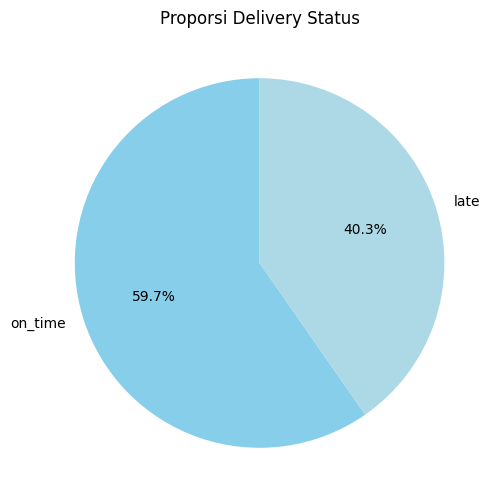

In [16]:
# Menghitung Total masing-masing value
delivery_status_counts = df["delivery_status"].value_counts()

# Membuat pie chart
plt.figure(figsize=(6,6))
plt.pie(delivery_status_counts, labels=delivery_status_counts.index, autopct="%1.1f%%", startangle=90, colors=["skyblue", "lightblue"])
plt.title("Proporsi Delivery Status")
plt.show()

Gambar diatas merupakan gambar pie chart yang memberikan informasi tentang proporsi data delivery status, dimana:

- Total customer yang mendapati barangnya datang tepat waktu yaitu sebesar **59.7%**
- Total customer yang mendapati barangnya mengalami keterlambatan yaitu sebesar **40.3%**

Dari data tersebut, menunjukan bahwa masih cukup banyak paket/barang yang mengalami keterlambatan. Meskipun barang yang datang tepat waktu lebih banyak dibandingkan dengan keterlambatan, tetap saja keterlambatan ini masuk termasuk cukup besar dan dapat menjadi sebuah kerugian bagi perusahaan, karena berdampak buruk bagi jalannya bisnis yang bisa saja customer satisfaction tidak terpenuhi dan customer lebih memilih untuk berbelanja di tempat lain yang bisa mendatangkan barang dengan tepat waktu

## Frekuensi Customer Care Calls: Perbandingan antara Pengiriman Late vs On Time

Ini adalah jumlah customer care calls berdasarkan delivery status (ontime & late) dimana data tersebut akan di plotkan menjadi visualisasi data

In [17]:
on_time_sum = df["customer_care_calls"][df["delivery_status"] == "on_time"].sum()
late_sum = df["customer_care_calls"][df["delivery_status"] == "late"].sum()
on_time_count = df["delivery_status"][df["delivery_status"] == "on_time"].count()
late_count = df["delivery_status"][df["delivery_status"] == "late"].count()

on_time_total = on_time_sum / on_time_count
late_total = late_sum / late_count
print("Rata-rata calls untuk pengiriman on time:", on_time_total)
print("Rata-rata calls untuk pengiriman late:", late_total)

Rata-rata calls untuk pengiriman on time: 3.9914673167758647
Rata-rata calls untuk pengiriman late: 4.147914317925592


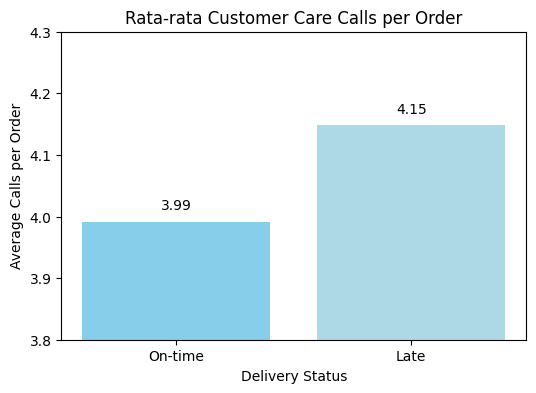

In [18]:
# Data dari perhitungan sebelumnya
categories = ["On-time", "Late"]
avg_calls = [on_time_total, late_total]  

# Plot bar chart rata-rata customer care calls per order
plt.figure(figsize=(6,4))
plt.bar(categories, avg_calls, color=['skyblue','lightblue'])

# label & judul
plt.title("Rata-rata Customer Care Calls per Order")
plt.xlabel("Delivery Status")
plt.ylabel("Average Calls per Order")

# Menambahkan nilai di atas bar
for i, v in enumerate(avg_calls):
    plt.text(i, v + 0.02, f"{v:.2f}", ha='center', fontsize=10)

plt.ylim(3.8, 4.3) 
plt.show()

Berdasarkan gambar diatas, dapat dilihat bahwa rata-rata customer care calls per order masih lebih banyak dilakukan oleh customer yang mengalami keterlambatan paket meskipun selisihnya hanya sedikit. Customer yang mengalami keterlambatan paket datang lebih sering menghubungi customer care karena biasanya ingin melakukan complain karena barangnya datang terlambat

## Keterlambatan pengiriman berdasarkan berat paket

Analisis data pada bagian ini ingin mencari tahu apakah berat produk / berat paket dapat berpengaruh terhadap keterlambatan pengiriman

In [19]:
# Cek Nilai Skewness
print("Nilai Skewness berat paket: ",df["weight_in_gms"].skew())

# Rata-rata berat paket
weight_avg = df["weight_in_gms"].mean()
print("Rata-rata berat paket: ",weight_avg)

# Mengkategorikan paket berdasarkan rata-rata
weight_category = df["weight_in_gms"].apply(lambda x: "High" if x >= weight_avg else "Low")
df["weight_category"] = df["weight_in_gms"].apply(lambda x: "High" if x >= weight_avg else "Low")

# delivery_status vs weight_category
weight_vs_status = pd.crosstab(df["weight_category"], df["delivery_status"])

# Persentase delivery_status vs weight_category
weight_vs_status_pct = weight_vs_status.div(weight_vs_status.sum(axis=1), axis=0) * 100
print("\nTabel Persentase Keterlambatan: ")
display(weight_vs_status_pct)

Nilai Skewness berat paket:  -0.24958549524039783
Rata-rata berat paket:  3633.873522458629

Tabel Persentase Keterlambatan: 


delivery_status,late,on_time
weight_category,,
High,53.793651,46.206349
Low,22.264794,77.735206


Pendistribusian skewness termasuk kedalam negative skewness, dan nilai skewness tidak terlalu besar yagn artinya data ini terdistribusi mendakati normal dan cukup simetris. Maka dari itu, dapat digunakan perhitungan `mean()` sebagai representatif data

Untuk Berat paket, dibuat 2 kategori untuk mengelompokkan berat paket

- Untuk berat paket < mean, termasuk ke dalam kategori "low" 
- Untuk berat paket > mean, termasuk ke dalam kategori "high"

Hal ini dilakukan agar pengukuran berat paket yang seperti apa yang menyebabkan keterlambatan pengiriman

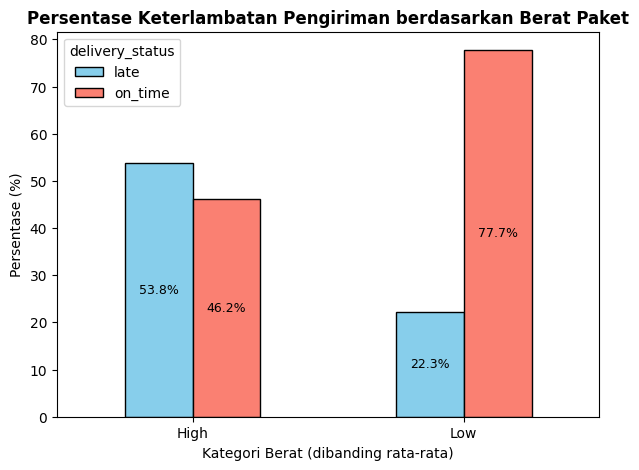

In [20]:
graph_plot = weight_vs_status_pct.plot(
    kind="bar", figsize=(7,5), color=["skyblue","salmon"], edgecolor="black", 
)

plt.title("Persentase Keterlambatan Pengiriman berdasarkan Berat Paket", fontsize=12, weight="bold")
plt.ylabel("Persentase (%)")
plt.xlabel("Kategori Berat (dibanding rata-rata)")
plt.xticks(rotation=0)

for c in graph_plot.containers:
    graph_plot.bar_label(c, fmt="%.1f%%", label_type="center", fontsize=9, color="black")

plt.show()

Dapat dilihat dari plot diatas, bahwa:

- Untuk berat paket dengan kategori "low" memiliki persentase delivery status late sebesar 22.3%, sedangkan untuk delivery status on time memiliki persentase sebesar 77.7%
- Untuk berat paket dengan kategori "high" memiliki persentase keterlambatan sebesar 53.8%, sedangkan untuk delivery status on time memiliki persentase sebesar 46.2%

Artinya, untuk berat paket dengan kategori high (mean > 3633.87gr) memiliki tingkat keterlambatan lumayan tinggi, dan ini bisa menjadi salah satu penyebab paket mengalami keterlambatan. Hal ini bisa terjadi karena proses pengiriman dengan berat diatas rata-rata cukup sulit dilakukan dibandingkan dengan pengiriman dengan berat dibawah rata-rata.

In [21]:
# Save Cleaned data to CSV
# df.to_csv("shipping_ecommerce_cleaned.csv", index=False)

In [22]:
# Chi-square test
res = stats.chi2_contingency(weight_vs_status)
print("P-value:",res.pvalue)

if res.pvalue < 0.05:
    print("Ada hubungan antara product importance dan keterlambatan.")
else:
    print("Tidak ada bukti kuat hubungan product importance dengan keterlambatan.")


P-value: 1.822175564552964e-243
Ada hubungan antara product importance dan keterlambatan.


- H0 : Ada hubungan antara berat paket dan keterlambatan.
- H1 : Tidak ada bukti kuat hubungan berat paket dengan keterlambatan.

Jika dihitung dengan menggunakan metode chi square, di dapatkan nilai p-value dibawah 0.05, yang berarti H0 Rejected, dan artinya berat paket berpengaruh terhadap keterlambatan paket

Paket yang memiliki berat diatas rata rata cenderung lebih sering mengalami keterlambatan

## Warehose Block yang sering terjadi keterlambatan

In [23]:
# hitung total pengiriman per block
total = df.groupby("warehouse_block")["delivery_status"].count()

# hitung jumlah telat per block
late = df[df["delivery_status"]=="late"].groupby("warehouse_block")["delivery_status"].count()

# hitung jumlah tepat waktu per block
on_time = df[df["delivery_status"]=="on_time"].groupby("warehouse_block")["delivery_status"].count()

# gabungkan jadi satu tabel
warehouse_block_summary = pd.DataFrame({
    "Total Shipments": total,
    "Late Shipments": late,
    "On Time Shipments": on_time
}).fillna(0)

# hitung persentase keterlambatan
warehouse_block_summary["Late_pct"] = (warehouse_block_summary["Late Shipments"] / warehouse_block_summary["Total Shipments"] * 100).round(2)

warehouse_block_summary

,Total Shipments,Late Shipments,On Time Shipments,Late_pct
warehouse_block,,,,
A,1832,757,1075,41.32
B,1833,729,1104,39.77
C,1833,739,1094,40.32
D,1834,738,1096,40.24
F,3666,1472,2194,40.15


Data diatas merupakan data keterlambatan dari masing-masing warehouse block

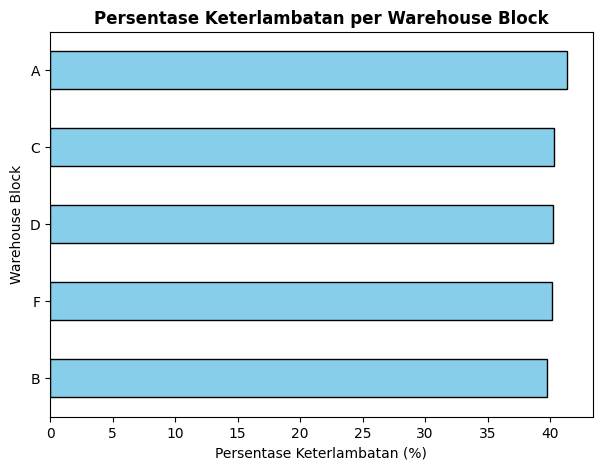

In [24]:
# Pembuatan Plot
plt.figure(figsize=(7,5))
warehouse_block_summary["Late_pct"].sort_values().plot(kind="barh", color="skyblue", edgecolor="black")

plt.title("Persentase Keterlambatan per Warehouse Block", fontsize=12, weight="bold")
plt.xlabel("Persentase Keterlambatan (%)")
plt.ylabel("Warehouse Block")
plt.show()

Dapat dilihat dari plot diatas, bahwa Ternyata Warehouse block A lebih sering mengalami keterlambatan pengiriman dengan nilai persentase sebesar 41.32%. Penyebab yang mengakibatkan keterlambatan pengiriman bisa saja karena kondisi gudang yang overload, yang diakibatkan oleh penawaran diskon, yang menyebabkan meningkatnya transaksi dan meningkatkan pengiriman.

## Analisis Keterlambatan Berdasarkan Tingkat Kepentingan Produk

In [25]:
# product_importance vs delivery_status
importance_vs_status = pd.crosstab(df["product_importance"], df["delivery_status"])

# Menghitung persentase keterlambatan
importance_vs_status_pct = importance_vs_status.div(importance_vs_status.sum(axis=1), axis=0) * 100
print("Persentase Product Importance vs Delivery Status: ")
display(importance_vs_status_pct.round(2))

Persentase Product Importance vs Delivery Status: 


delivery_status,late,on_time
product_importance,,
high,35.02,64.98
low,40.71,59.29
medium,40.95,59.05


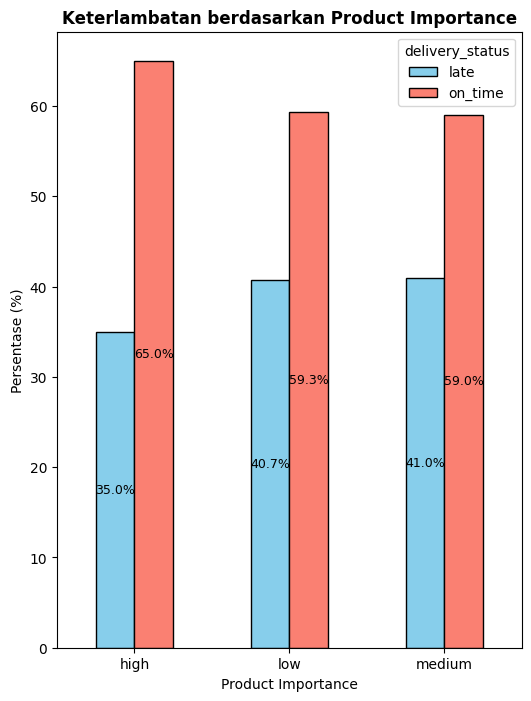

In [26]:
# 3. Plot stacked bar (proporsi)
ax = importance_vs_status_pct.plot(
    kind="bar", stacked=False, figsize=(6,8),
    color=["skyblue","salmon"], edgecolor="black"
)

plt.title("Keterlambatan berdasarkan Product Importance", fontsize=12, weight="bold")
plt.ylabel("Persentase (%)")
plt.xlabel("Product Importance")
plt.xticks(rotation=0)

# Tambahkan persentase di dalam batang
for c in ax.containers:
    ax.bar_label(c, fmt="%.1f%%", label_type="center", fontsize=9, color="black")

plt.show()

Jika dilihat plot diatas, dapat dikatakan bahwa tingkat kepentingan produk pada kategori low dan medium memiliki nilai late yang mirip dengan selisih 0.3%, namun nilai ini masih termasuk cukup tinggi.

untuk kategori high, memiliki persentase keterlambatan sebesar 35, lebih rendah dari low dan medium. Artinya, pengkategorian ini sangatlah berpengaruh terhadap keterlambatan paket. 

untuk customer yang sangat butuh akan barangnya cepat sampai, harus memilih prioritas tinggi agar paket bisa sampai tepat waktu.

In [27]:
# Chi-square test
imp_vs_st = stats.chi2_contingency(importance_vs_status)
print("P-value:",imp_vs_st.pvalue)

if imp_vs_st.pvalue < 0.05:
    print("Ada hubungan antara product importance dan keterlambatan.")
else:
    print("Tidak ada bukti kuat hubungan product importance dengan keterlambatan.")

P-value: 0.0022512391939208177
Ada hubungan antara product importance dan keterlambatan.


- H0 : Tidak ada bukti kuat hubungan berat paket dengan keterlambatan.
- H1 : Ada hubungan antara berat paket dan keterlambatan

Jika dihitung dengan menggunakan metode chi square, di dapatkan nilai p-value dibawah 0.05, yang berarti H0 Rejected, dan prioritas paket berpengaruh terhadap keterlambatan paket

## Korelasi antara Shipment Mode dengan Keterlambatan

In [28]:
# korelasi shipment mode dengan delivery status
shipment_vs_status = pd.crosstab(df["mode_of_shipment"], df["delivery_status"])

# Persentase per shipment_vs_status
shipment_vs_status_pct = shipment_vs_status.div(shipment_vs_status.sum(axis=1), axis=0) * 100
print("Mode of Shipment vs Delivery Status")
shipment_vs_status_pct

Mode of Shipment vs Delivery Status


delivery_status,late,on_time
mode_of_shipment,,
flight,39.842431,60.157569
road,41.193182,58.806818
ship,40.235893,59.764107


In [29]:
# Chi-square test
mode_vs_st = stats.chi2_contingency(shipment_vs_status)
print("P-value:",mode_vs_st.pvalue)

if mode_vs_st.pvalue < 0.05:
    print("Ada hubungan antara product importance dan keterlambatan.")
else:
    print("Tidak ada bukti kuat hubungan berat paket dengan keterlambatan.")

P-value: 0.6880278359209553
Tidak ada bukti kuat hubungan berat paket dengan keterlambatan.


- H0 : Tidak ada bukti kuat hubungan berat paket dengan keterlambatan.
- H1 : Ada hubungan antara berat paket dan keterlambatan

Jika dihitung dengan menggunakan metode chi square, di dapatkan nilai p-value diatas 0.05, yang berarti H0 Accepted, dan artinya mode shipment tidak berpengaruh terhadap keterlambatan paket

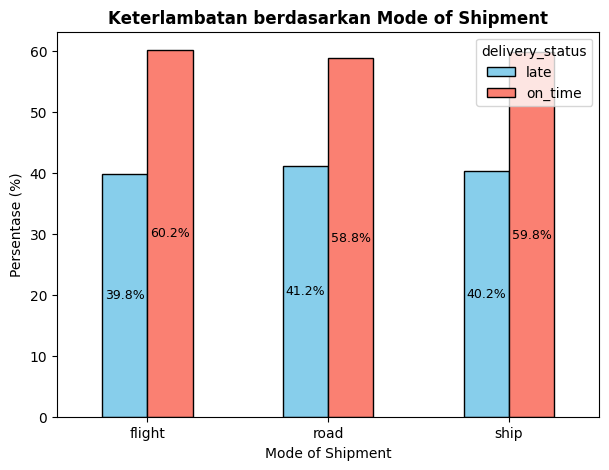

In [30]:
# Membuat plot
ship_plot = shipment_vs_status_pct.plot(
    kind="bar", stacked=False, figsize=(7,5),
    color=["skyblue","salmon"], edgecolor="black"
)

plt.title("Keterlambatan berdasarkan Mode of Shipment", fontsize=12, weight="bold")
plt.ylabel("Persentase (%)")
plt.xlabel("Mode of Shipment")
plt.xticks(rotation=0)

for c in ship_plot.containers:
    ship_plot.bar_label(c, fmt="%.1f%%", label_type="center", fontsize=9, color="black")

plt.show()

Bedasarkan hasil plot diatas, bahwa semua keterlambatan memiliki persentase keterlambatan yang mirip, tidak ada perbedaan signifikan. Ini menandakan bahwa mode shipment tidak berpengaruh terhadap keterlambatan pengiriman

##  Faktor yang paling berkontribusi keterlambatan pengiriman

In [31]:
# Variabel numerik yang ingin dianalisis
num_vars = ["customer_care_calls", "customer_rating", "prior_purchases", 
            "discount_offered", "weight_in_gms"]

# Buat dataframe kosong untuk hasil
results = pd.DataFrame()

for var in num_vars:
    grouped = df.groupby("delivery_status")[var]
    stats_summary = grouped.agg(
        mean = "mean",
        median = "median",
        std = "std",
        var = "var",
        min = "min",
        max = "max"
    )
    
    # Tambahkan IQR, Range, Coefficient of Variation, Skewness, Kurtosis
    stats_summary["IQR"] = grouped.quantile(0.75) - grouped.quantile(0.25)
    stats_summary["Range"] = stats_summary["max"] - stats_summary["min"]
    stats_summary["CV"] = stats_summary["std"] / stats_summary["mean"]  # Coefficient of Variation
    stats_summary["Skewness"] = grouped.apply(lambda x: stats.skew(x))
    stats_summary["Kurtosis"] = grouped.apply(lambda x: stats.kurtosis(x))
    
    # Simpan ke results dengan multiindex (var, stats)
    stats_summary["Variable"] = var
    results = pd.concat([results, stats_summary])

# Reset index biar rapi
results = results.reset_index().set_index(["Variable", "delivery_status"])

# Tampilkan hasil
results


mean  median          std  \
Variable            delivery_status                                     
customer_care_calls late                4.147914     4.0     1.162775   
                    on_time             3.991467     4.0     1.122592   
customer_rating     late                2.967756     3.0     1.414882   
                    on_time             3.005790     3.0     1.412692   
prior_purchases     late                3.670349     3.0     1.525608   
                    on_time             3.498095     3.0     1.517285   
discount_offered    late                5.545434     6.0     2.877815   
                    on_time            18.663721     9.0    19.108797   
weight_in_gms       late             4168.433822  4672.0  1574.054105   
                    on_time          3272.640104  3231.0  1576.148391   

                                              var   min   max     IQR  Range  \
Variable            delivery_status                                            
customer_care_calls late             1.352045e+00     2     7     2.0      5   
                    on_time          1.260214e+00     2     7     2.0      5   
customer_rating     late             2.001892e+00     1     5     2.0      4   
                    on_time          1.995699e+00     1     5     2.0      4   
prior_purchases     late             2.327481e+00     2    10     1.0      8   
                    on_time          2.302153e+00     2    10     1.0      8   
discount_offered    late             8.281821e+00     1    10     5.0      9   
                    on_time          3.651461e+02     1    65    27.0     64   
weight_in_gms       late             2.477646e+06  1001  6000  1294.0   4999   
                    on_time          2.484244e+06  1001  7846  2961.0   6845   

                                           CV  Skewness  Kurtosis  
Variable            delivery_status                                
customer_care_calls late             0.280328  0.350849 -0.412514  
                    on_time          0.281248  0.414290 -0.235100  
customer_rating     late             0.476751  0.024508 -1.301359  
                    on_time          0.469990 -0.008945 -1.291043  
prior_purchases     late             0.415658  1.540847  3.678768  
                    on_time          0.433746  1.789929  4.310432  
discount_offered    late             0.518952 -0.010981 -1.229124  
                    on_time          1.023847  1.052253 -0.332105  
weight_in_gms       late             0.377613 -0.926948 -0.644465  
                    on_time          0.481614  0.144206 -1.381130

Faktor yang berhubungan dengan keterlambatan: lebih banyak customer care calls, rating lebih rendah, diskon lebih tinggi, dan paket lebih berat.

Implikasi bisnis: fokus perbaikan bisa diarahkan pada manajemen promo/discount (agar tidak overload sistem) dan optimalisasi logistik untuk barang berat.

# Conclusion

Analisis menunjukkan adanya perbedaan perilaku pelanggan antara pengiriman on-time dan terlambat. Pelanggan dengan pengiriman terlambat rata-rata lebih sering menghubungi customer care, yang menandakan keterlambatan meningkatkan kebutuhan untuk follow-up. Customer rating juga sedikit lebih rendah pada pengiriman terlambat, sehingga keterlambatan berpengaruh pada kepuasan pelanggan. 

Menariknya, order yang terlambat justru lebih banyak berasal dari pelanggan dengan riwayat pembelian lebih tinggi. Selain itu, pemberian diskon besar terbukti berhubungan dengan meningkatnya risiko keterlambatan. Kondisi ini kemungkinan terjadi karena lonjakan pesanan saat periode promo. Berat paket juga menjadi faktor penting karena barang dengan bobot lebih besar lebih sering mengalami keterlambatan. Hal ini menunjukkan adanya tantangan dalam proses logistik saat menangani paket berat. Secara keseluruhan, faktor diskon dan berat barang berkontribusi besar pada keterlambatan pengiriman. 

Kesimpulannya, keterlambatan pengiriman tidak hanya berdampak pada pengalaman pelanggan, tetapi juga meningkatkan beban customer care. Diharapkan dari adanya data analisis ini, dapat dilakukan beberapa improvement yang perlu diperbaiki dan dibenahi seperti pemberian diskon yang harus disesuaikan kembali agar tidak berpengaruh ke waktu pengiriman.